In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1YYcPg4eT9CKR1X3DkYoZdokc24oWyakw' # The shareable link
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ASX200Daily.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression

In [0]:
# Reading data
daily_data = pd.read_csv('ASX200Daily.csv')
print(daily_data.head())

         Date         Open         High  ...        Close    Adj Close  Volume
0  2000-03-31  3133.300049  3133.300049  ...  3133.300049  3133.300049     0.0
1  2000-04-03  3133.800049  3191.000000  ...  3191.000000  3191.000000     0.0
2  2000-04-04  3197.199951  3199.000000  ...  3176.800049  3176.800049     0.0
3  2000-04-05  3176.500000  3176.500000  ...  3155.399902  3155.399902     0.0
4  2000-04-06  3153.500000  3167.500000  ...  3157.100098  3157.100098     0.0

[5 rows x 7 columns]


In [0]:
# Converting to a time series
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace = True)
daily_ts = pd.Series(daily_data['Close'])
print(daily_ts.head())

Date
2000-03-31    3133.300049
2000-04-03    3191.000000
2000-04-04    3176.800049
2000-04-05    3155.399902
2000-04-06    3157.100098
Name: Close, dtype: float64


In [0]:
# Checking data for missing values
print('Before data cleaning ->')
print('No. of missing values in daily data:', sum(daily_ts.isna()))

Before data cleaning ->
No. of missing values in daily data: 42


In [0]:
# Removing missing values
daily_ts.dropna(inplace=True)

In [0]:
# Checking data for missing values again
print('After data cleaning ->')
print('No. of missing values in daily data:', sum(daily_ts.isna()))

After data cleaning ->
No. of missing values in daily data: 0


In [0]:
# Descriptive statistics
print('Daily data ->')
print(daily_ts.describe())

Daily data ->
count    4779.000000
mean     4638.686943
std      1008.551860
min      2700.399902
25%      3597.000000
50%      4750.600098
75%      5456.199951
max      6828.700195
Name: Close, dtype: float64


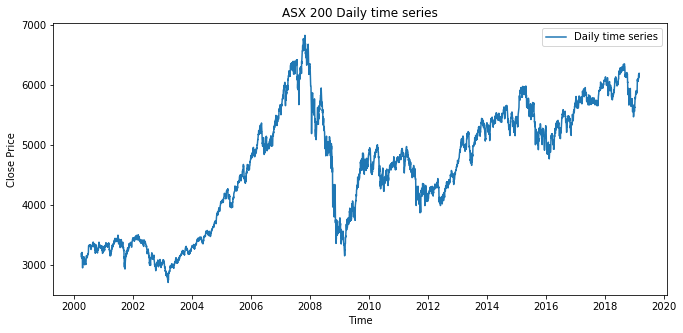

In [0]:
# Setting figure width and height
rcParams['figure.figsize'] = 15, 7

# Plotting time series
plt.plot(daily_ts, label = "Daily time series")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ASX 200 Daily time series')
plt.legend()

#### Zooming in on data to see if there are any significant patterns

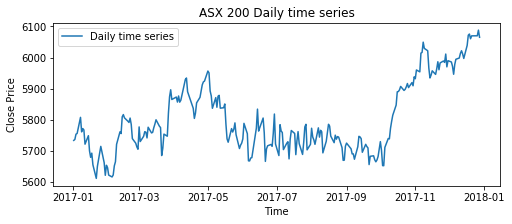

In [0]:
# Plotting a random year of the dataset
plt.plot(daily_ts['2017'], label = "Daily time series")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ASX 200 Daily time series')
plt.legend()

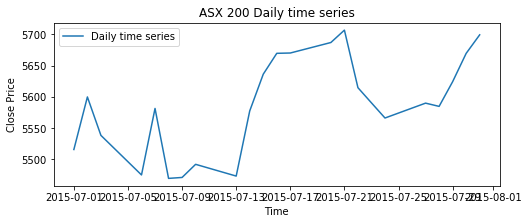

In [0]:
# Plotting a random year-month of the dataset
plt.plot(daily_ts['2015-07'], label = "Daily time series")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ASX 200 Daily time series')
plt.legend()

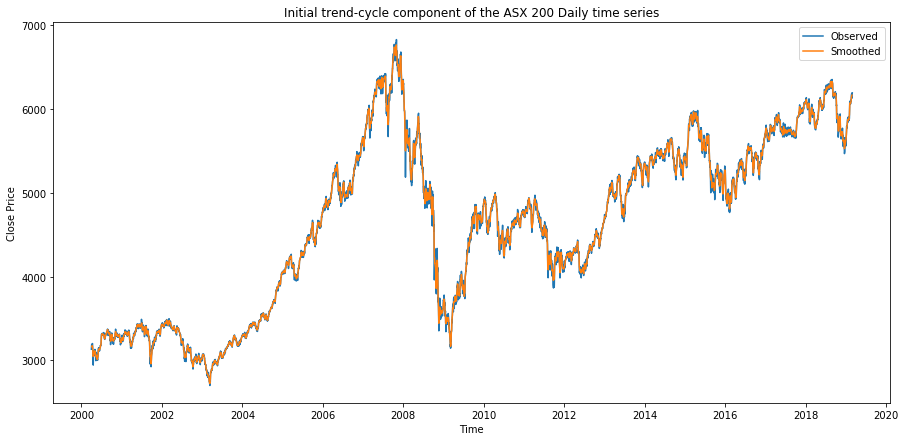

In [0]:
# Smoothing data by using CMA-5 to calculate the initial trend-cycle estimate
trend_cycle = daily_ts.rolling(5, center=True).mean()

plt.plot(daily_ts, label = "Observed")
plt.plot(trend_cycle, label = "Smoothed")
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Initial trend-cycle component of the ASX 200 Daily time series')
plt.legend()

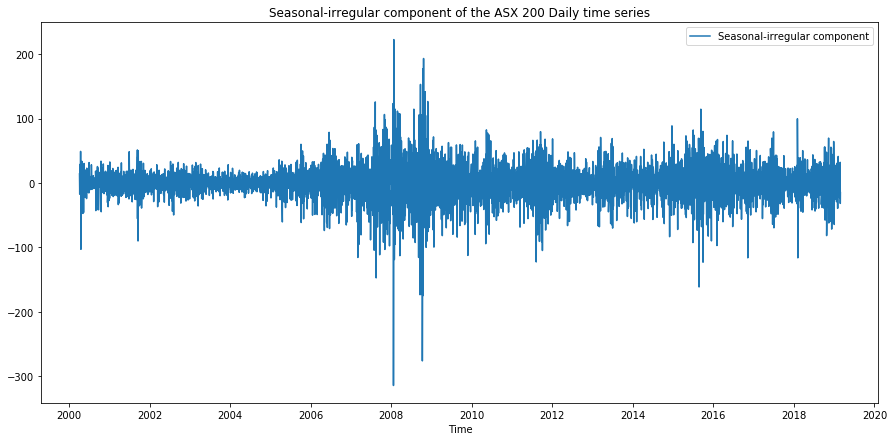

In [0]:
# Calculating the seasonal-irregular component
seasonal = daily_ts - trend_cycle

plt.plot(seasonal, label = "Seasonal-irregular component")
plt.xlabel('Time')
plt.title('Seasonal-irregular component of the ASX 200 Daily time series')
plt.legend()